In [13]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
image_digits = digits.data
class_digits = digits.target

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X_digits[0] / 16.0

array([ 0.    ,  0.    ,  0.3125,  0.8125,  0.5625,  0.0625,  0.    ,
        0.    ,  0.    ,  0.    ,  0.8125,  0.9375,  0.625 ,  0.9375,
        0.3125,  0.    ,  0.    ,  0.1875,  0.9375,  0.125 ,  0.    ,
        0.6875,  0.5   ,  0.    ,  0.    ,  0.25  ,  0.75  ,  0.    ,
        0.    ,  0.5   ,  0.5   ,  0.    ,  0.    ,  0.3125,  0.5   ,
        0.    ,  0.    ,  0.5625,  0.5   ,  0.    ,  0.    ,  0.25  ,
        0.6875,  0.    ,  0.0625,  0.75  ,  0.4375,  0.    ,  0.    ,
        0.125 ,  0.875 ,  0.3125,  0.625 ,  0.75  ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.375 ,  0.8125,  0.625 ,  0.    ,  0.    ,  0.    ])

In [16]:
pixels = np.reshape(X_digits[0] / 16.0, (8,8))

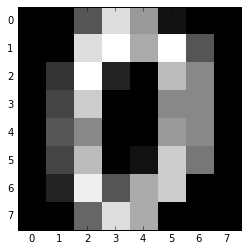

In [17]:
%matplotlib inline
plt.imshow(pixels, cmap=plt.cm.gray, interpolation='nearest')

In [19]:
n_samples = len(X_digits)

split = .9
n_training = int(split * n_samples)
n_test = int((1-split) * n_samples)

x_train = image_digits[:n_training]
y_train = class_digits[:n_training]
x_test = image_digits[n_training:]
y_test = class_digits[n_training:]

In [21]:
x_test, y_test

(array([[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,   6., ...,   9.,   6.,   2.],
        [  0.,   0.,   0., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   2., ...,  12.,   0.,   0.],
        [  0.,   0.,  10., ...,  12.,   1.,   0.]]),
 array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3,
        1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4, 4, 9,
        0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
        9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,
        1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
        6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
        6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4,
        4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8]))

In [22]:
x_test[0], y_test[0]

(array([  0.,   0.,   5.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   9.,
         16.,   7.,   0.,   0.,   0.,   0.,   0.,  12.,  15.,   2.,   0.,
          0.,   0.,   0.,   1.,  15.,  16.,  15.,   4.,   0.,   0.,   0.,
          0.,   9.,  13.,  16.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,
         14.,  12.,   0.,   0.,   0.,   0.,   5.,  12.,  16.,   8.,   0.,
          0.,   0.,   0.,   3.,  15.,  15.,   1.,   0.,   0.]), 5)

In [30]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
print('KNN score: %f' % knn.fit(x_train, y_train).score(x_test, y_test))

KNN score: 0.961111


In [31]:
from sklearn import neighbors, linear_model
logistic = linear_model.LogisticRegression()
print('LogisticRegression score: %f' % logistic.fit(x_train, y_train).score(x_test, y_test))

LogisticRegression score: 0.938889


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(x_test))

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 16,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 15,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 16]])